C:\Users\최지원\AppData\Local\Temp\ipykernel_7312\1569413008.py:25: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='cp949')


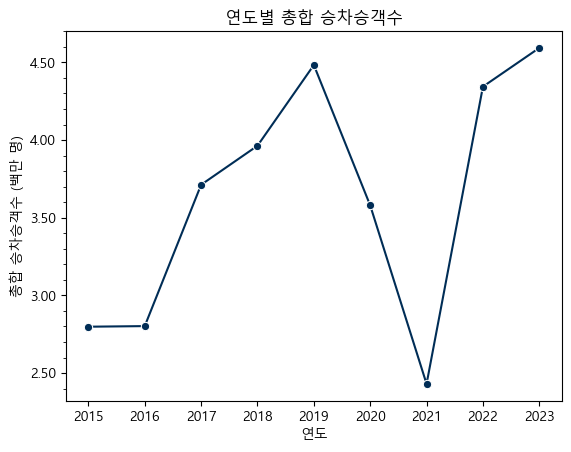

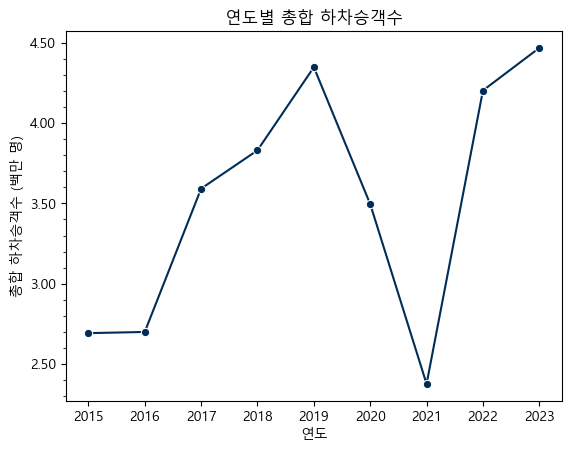

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib import font_manager, rc
from matplotlib.ticker import MultipleLocator

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 'Malgun Gothic' 폰트의 경로로 수정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 파일 경로
folder_path = r'C:\Users\최지원\Downloads\학교\빅데이터\새 폴더\Dataset\NBusDataset'

# 2015년부터 2023년 파일들을 불러오기
files_to_read = [f'{year}_NBusData.csv' for year in range(2015, 2024)]

df_list = []  # 각 CSV 파일의 데이터프레임을 저장할 리스트

for file in files_to_read:
    file_path = os.path.join(folder_path, file)
    # 'cp949' 인코딩을 사용하여 파일 읽기
    df = pd.read_csv(file_path, encoding='cp949')
    df_list.append(df)

# 모든 데이터프레임을 합치기
merged_df = pd.concat(df_list, ignore_index=True)

# 연도 정보 추가
merged_df['Year'] = merged_df['사용년월'].astype(str).str[:4]

# 연도별로 그룹화하여 총합 승차승객수와 하차승객수 구하기
grouped_boarding = merged_df.groupby('Year')['승차총승객수'].sum()
grouped_alighting = merged_df.groupby('Year')['하차총승객수'].sum()

# 연도별 승차승객수의 합 막대그래프
ax = sns.lineplot(x=grouped_boarding.index, y=grouped_boarding.values, color='#002D56', marker='o')
plt.title('연도별 총합 승차승객수')
plt.xlabel('연도')
plt.ylabel('총합 승차승객수 (백만 명)')

ax.yaxis.set_minor_locator(MultipleLocator(100000))

# y축 단위를 '백만'으로 표시하되, 소수점 둘째 자리까지 표시
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.2f}'.format(x/1e6)))

plt.show()

# 연도별 하차승객수의 합 막대그래프
ax = sns.lineplot(x=grouped_alighting.index, y=grouped_alighting.values, color='#002D56', marker='o')
plt.title('연도별 총합 하차승객수')
plt.xlabel('연도')
plt.ylabel('총합 하차승객수 (백만 명)')

ax.yaxis.set_minor_locator(MultipleLocator(100000))

# y축 단위를 '백만'으로 표시하되, 소수점 둘째 자리까지 표시
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.2f}'.format(x/1e6)))

plt.show()